## Zadanie 5

In [4]:
class MinCount:
    def __init__(self, k, hash_f):
        self.k = k
        self.hash_f = hash_f
        self.M = [1] * k
    
    def push(self, elem):
        h = self.hash_f(elem)
        if h < self.M[-1] and h not in self.M:
            self.M[-1] = h
            self.M.sort()

    def count(self):
        if self.M[-1] == 1:
            return sum([1 for x in self.M if x != 1])

        return (self.k - 1) / self.M[-1]

In [5]:
import hashlib
import struct
import numpy as np
import random

def good_hash(x):
    [number] = struct.unpack("<I", hashlib.md5(x).digest()[:4])
    return number / float(0xFFFFFFFF)

### a)

In [18]:
def experiment(m, k):
    res = []
    for n in range(1, 10 ** 4 + 1):
        min_count = MinCount(k, good_hash)

        for e in range(n ** 2, n ** 2 + n):
            p = struct.pack("i", e)
            for _ in range(m(e)):
                min_count.push(p)

        res.append((n, min_count.count() / float(n)))
    
    return res

def m1(e):
    return 1

def m2(e):
    return 2

print(np.average(experiment(m1, 100)))
print(np.average(experiment(m2, 100)))

2500.7498358151024
2500.7498358151024


### b)

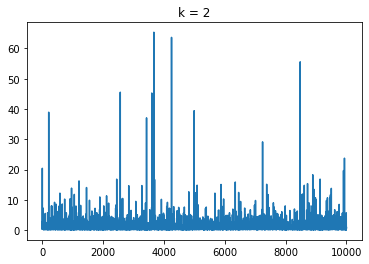

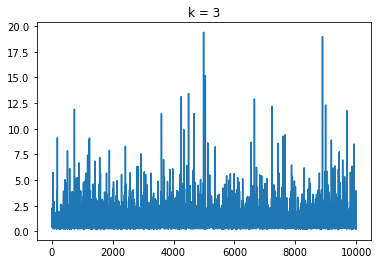

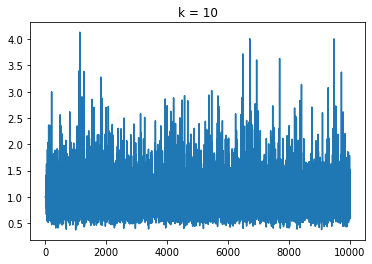

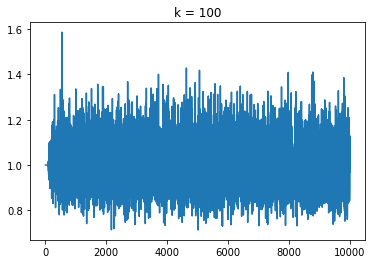

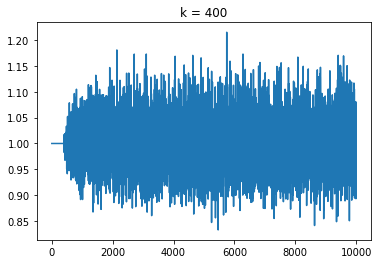

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

for k in [2, 3, 10, 100, 400]:
    r = experiment(m1, k)
    x, y = zip(*r)
    plt.title("k = " + str(k))
    plt.plot(x, y)
    plt.show()

### c)

In [20]:
_, x = zip(*experiment(m1, 450))

sum([1 for i in list(x) if i > .9 and i < 1.1]) / 10000

0.9759

In [21]:
_, x = zip(*experiment(m1, 350))

sum([1 for i in list(x) if i > .9 and i < 1.1]) / 10000

0.9513

## Zadanie 6

In [6]:
def experiment(h):
    res = []
    for n in range(1, 1000):
        min_count = MinCount(100, h)

        for e in range(n ** 2, n ** 2 + n):
            p = struct.pack("i", e)
            for _ in range(3):
                min_count.push(p)

        res.append((n, min_count.count() / float(n)))
    
    return res

def hash1(x):
    [number] = struct.unpack("<B", hashlib.md5(x).digest()[:1])
    return number / float(0xFF)

def hash2(x):
    [number] = struct.unpack("<H", hashlib.md5(x).digest()[:2])
    return number / float(0xFFFF)

r1 = experiment(hash1)
r2 = experiment(hash2)
r3 = experiment(good_hash)

x1, y1 = zip(*r1)
x2, y2 = zip(*r2)
x3, y3 = zip(*r3)

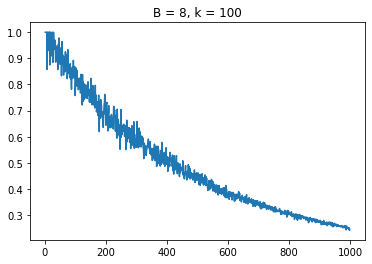

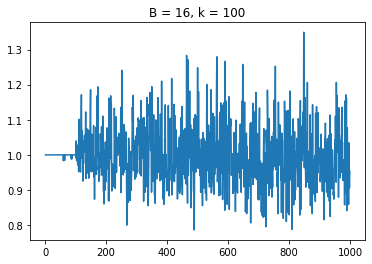

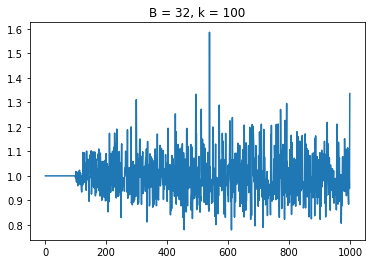

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.title("B = 8, k = 100")
plt.plot(x1, y1)
plt.show()
plt.title("B = 16, k = 100")
plt.plot(x2, y2)
plt.show()
plt.title("B = 32, k = 100")
plt.plot(x3, y3)
plt.show()